# Importing libraries

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import random
%matplotlib inline

# EDA of the dataset

In [8]:
df=pd.read_csv("Train_speed.csv",encoding = "ISO-8859-1")
df

,Train_No,Train_Name,Avg_Speed,Rating,Punctuality,Cleanliness,Food,Availability,Safety
0,12213/12214,Yeshvantapur - Delhi Sarai Rohilla AC Duronto ...,75.64,4.6,Good,Excellent,Good,Excellent,Excellent
1,12219/12220,Lokmanya Tilak Terminus - Secunderabad AC Duro...,64.38,4.6,Excellent,Excellent,Good,Excellent,Good
2,12221/12222,Pune - Howrah Duronto Express,72.42,4.6,Excellent,Excellent,Good,Good,Excellent
3,12223/12224,Lokmanya Tilak Terminus - Ernakulam Duronto Ex...,60.00,4.6,Excellent,Good,Good,Excellent,Excellent
4,12227/12228,Mumbai Central - Indore Duronto Express,65.99,4.8,Excellent,Excellent,Good,Excellent,Excellent
...,...,...,...,...,...,...,...,...,...
63,12931/12932,Mumbai Central - Ahmedabad Double Decker Express,69.00,4.6,Good,Excellent,Good,Excellent,Excellent
64,20805/20806,VisakhapatnamÂ -Â New DelhiÂ AP Express,76.00,4.2,Good,Good,Good,Excellent,Good
65,12451/12452,Shram Shakti Express,67.00,4.5,Excellent,Excellent,Good,Good,Excellent
66,17235/17236,KSR Bengaluru - Nagercoil Express,45.00,3.6,Good,Good,Average,Good,Good


In [9]:
# Get the names of all the labels or columns we have in our dataset.

df.columns

Index(['Train_No', 'Train_Name', 'Avg_Speed', 'Rating', 'Punctuality',
       'Cleanliness', 'Food', 'Availability', 'Safety'],
      dtype='object')

In [23]:
#fetching the number of rows and columns

df.shape

(68, 14)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Train_No      68 non-null     object 
 1   Train_Name    68 non-null     object 
 2   Avg_Speed     67 non-null     float64
 3   Rating        67 non-null     float64
 4   Punctuality   67 non-null     object 
 5   Cleanliness   67 non-null     object 
 6   Food          67 non-null     object 
 7   Availability  67 non-null     object 
 8   Safety        67 non-null     object 
dtypes: float64(2), object(7)
memory usage: 4.9+ KB


In [11]:
#describing the dataset

df.describe()

,Avg_Speed,Rating
count,67.000000,67.000000
mean,73.761791,4.423881
std,8.101663,0.371357
min,45.000000,3.300000
25%,68.500000,4.250000
50%,74.000000,4.600000
75%,78.000000,4.600000
max,91.300000,5.000000


Assigning values

In [12]:
avgspeed = df.Avg_Speed.values
punctual = df.Punctuality.values

Setting default size to make large graphs for the ease of visualisation. 
After that plot a scatter graph to see if any clusters are forming withing the label values.

Text(0.5, 0, 'Average Speed')

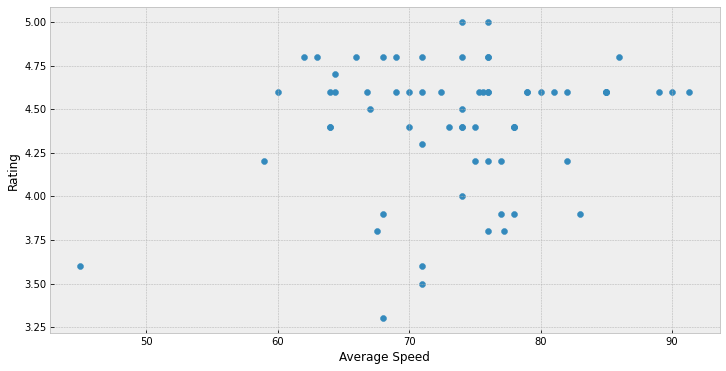

In [14]:
rating = df.Rating.values
plt.scatter(avgspeed, rating)
plt.ylabel("Rating")
plt.xlabel("Average Speed")

This scatter plot shown above displays the relation between overall ratings and speed of the train. It describes that the trains 
with speeds over 80km/h have better rating.
But this result is not enough to reach up to a certain conclusion.
So let's try other visualisation methods to find other insights. Like a bar plot.

Text(0, 0.5, 'Average Speed')

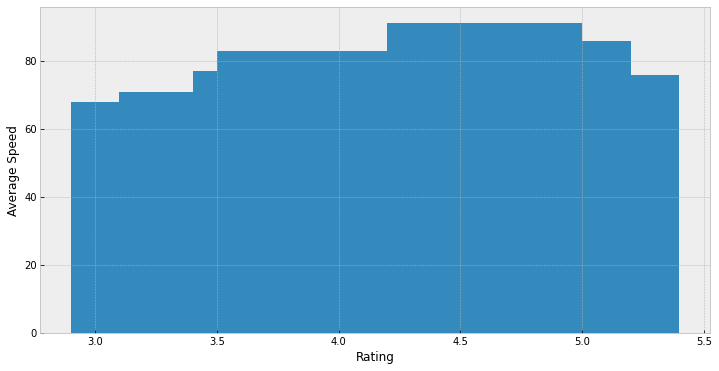

In [15]:
plt.bar(x = rating, height = avgspeed)
plt.xlabel("Rating")
plt.ylabel("Average Speed")

Refine the graph by decreasing the width. Default width of a bar is 0.8. Here I've used 0.05 as the width.

Text(0.5, 0, 'Average Speed')

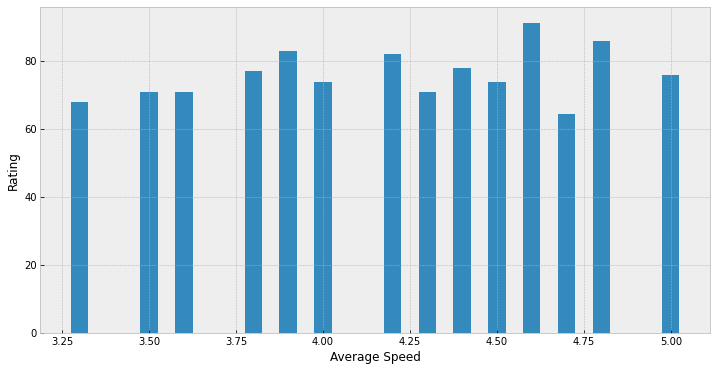

In [16]:
plt.bar(x = rating, height = avgspeed, width = 0.05)
plt.ylabel("Rating")
plt.xlabel("Average Speed")

Conclusions that can be drawn are:

1)The speed limit of Indian trains are in between 60 km/h to 90 km/h range.

2)Trains having speed above 80km/h have better ratings. This indicates that higher speed is preferred by passengers because
it saves travelling time.

In order to support our conclusion we can draw a regression type plot using regplot method.

Text(0.5, 0, 'Average Speed')

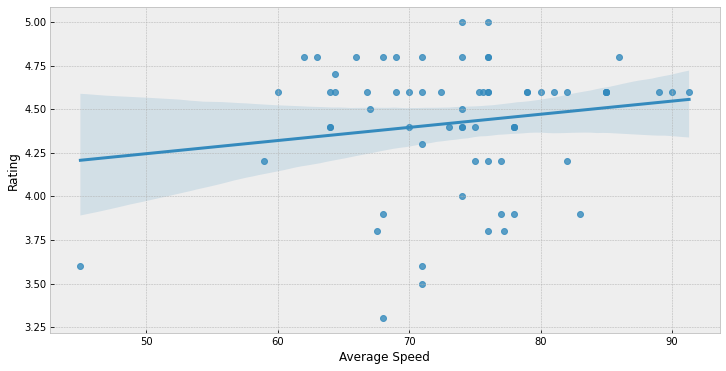

In [17]:
sns.regplot(x= "Avg_Speed", y= "Rating", data = df)
plt.ylabel("Rating")
plt.xlabel("Average Speed")

It is observed that the ratings get better as the speed increases.

Now let's find out correlation between speed and availability of the train.

In [18]:
# Rank will be a function to alter the data to add more diversity. This is an example and in real world tasks, the data has
# to be filled after quality research.
def rank(array):
    List1 = []
    i = 0
    while i in range(len(array)):
        if array[i] == "Excellent":
            r = random.uniform(4.0, 5.0)
            r = round(r, 1)
            List1.append(r)
        elif array[i] == "Good":
            r = random.uniform(3.0, 4.0)
            r = round(r, 1)
            List1.append(r)
        elif array[i] == "Average":
            r = random.uniform(2.0, 3.0)
            r = round(r, 1)
            List1.append(r)
        else:
            r = random.uniform(1.0, 2.0)
            r = round(r, 1)
            List1.append(r)
        i += 1
    return List1

In [19]:
df["Punctuality_Rating"] = rank(df.Punctuality.values)
df["Cleanliness_Rating"] = rank(df.Cleanliness.values)
df["Food_Rating"] = rank(df.Food.values)
df["Availability_Rating"] = rank(df.Availability.values)
df["Safety_Rating"] = rank(df.Safety.values)
df

,Train_No,Train_Name,Avg_Speed,Rating,Punctuality,Cleanliness,Food,Availability,Safety,Punctuality_Rating,Cleanliness_Rating,Food_Rating,Availability_Rating,Safety_Rating
0,12213/12214,Yeshvantapur - Delhi Sarai Rohilla AC Duronto ...,75.64,4.6,Good,Excellent,Good,Excellent,Excellent,4.0,4.6,3.5,4.1,4.9
1,12219/12220,Lokmanya Tilak Terminus - Secunderabad AC Duro...,64.38,4.6,Excellent,Excellent,Good,Excellent,Good,5.0,4.7,3.3,4.3,3.5
2,12221/12222,Pune - Howrah Duronto Express,72.42,4.6,Excellent,Excellent,Good,Good,Excellent,4.8,4.8,3.7,3.1,4.1
3,12223/12224,Lokmanya Tilak Terminus - Ernakulam Duronto Ex...,60.00,4.6,Excellent,Good,Good,Excellent,Excellent,4.4,3.2,3.5,4.7,4.7
4,12227/12228,Mumbai Central - Indore Duronto Express,65.99,4.8,Excellent,Excellent,Good,Excellent,Excellent,5.0,4.6,3.7,4.9,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,12931/12932,Mumbai Central - Ahmedabad Double Decker Express,69.00,4.6,Good,Excellent,Good,Excellent,Excellent,3.5,5.0,3.4,4.2,4.5
64,20805/20806,VisakhapatnamÂ -Â New DelhiÂ AP Express,76.00,4.2,Good,Good,Good,Excellent,Good,3.7,3.8,3.3,4.5,3.7
65,12451/12452,Shram Shakti Express,67.00,4.5,Excellent,Excellent,Good,Good,Excellent,4.5,4.4,3.7,3.9,4.0
66,17235/17236,KSR Bengaluru - Nagercoil Express,45.00,3.6,Good,Good,Average,Good,Good,3.9,3.1,2.6,3.1,3.9


These columns will be ued for regression and let's find correlation.

Text(0.5, 0, 'Average Speed')

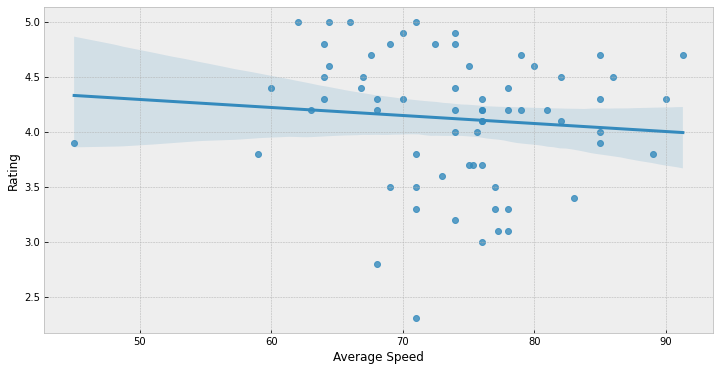

In [20]:
sns.regplot(x= "Avg_Speed", y= "Punctuality_Rating", data = df)
plt.ylabel("Rating")
plt.xlabel("Average Speed")

When we do not get better insights from the data, this is due to the reason that:-

1)Dataset is small.

2)Data for a particular label has less variability or diversity.

To avoid this use large and diverse datasets.

We plot everything on the same graph to save time and get relation between labels.
Make sure coordinates are of same type. Do color correction for better visibility.

<AxesSubplot:xlabel='Avg_Speed', ylabel='Safety_Rating'>

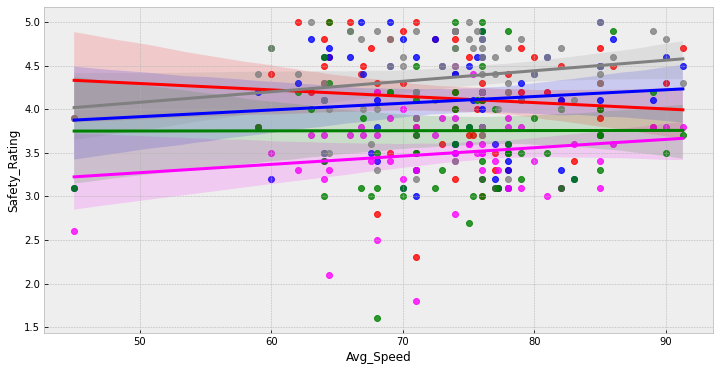

In [21]:
sns.regplot(x= "Avg_Speed", y= "Punctuality_Rating", data = df, color = "red")
sns.regplot(x= "Avg_Speed", y= "Cleanliness_Rating", data = df, color = "blue")
sns.regplot(x= "Avg_Speed", y= "Food_Rating", data = df, color = "magenta")
sns.regplot(x= "Avg_Speed", y= "Availability_Rating", data = df, color = "green")
sns.regplot(x= "Avg_Speed", y= "Safety_Rating", data = df, color = "grey")

***Conclusions:***

1)The trains which are mostly used have a speed in between 60 to 80 range.

2)As speed increases, the quality of food, cleanliness and safety increses. This is due to the reason that the faster the train is, the higher is the fare. And in turn higher fare results in better facilities.

3)All trains are punctual and equally available.

***Suggestions:***

1)More focus has to be given on the trains with poor overall ratings .
2)Trains average operating speed must be above 60 km/h.